In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw

import json

### Intepolate between clear-sunset and rain-sunset
- cloudiness
- precipitation
- precipitation_deposits
- wetness
- fog_density
- wind_intensity

### Layered folders, parse into 2d lists of dicts

In [2]:
import os

txt_lists = [[], [], [], [], [], []]

for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_clear-sunset_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[0].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-20_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[1].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-40_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[2].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-60_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[3].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-80_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[4].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-100_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[5].append(json_object)

### Examining results

In [3]:
count_array = []
for txt_list in txt_lists:
    count = 0
    for txt in txt_list:
        if txt['_checkpoint']['records'][0]['status'] == 'Completed':
            count += 1
    count_array.append(count/100)
    
print(count_array)

[1.0, 0.0, 1.0, 1.0, 1.0, 1.0]


In [4]:
count_array = []
for txt_list in txt_lists:
    count = 0
    for txt in txt_list:
        count += txt['_checkpoint']['records'][0]['scores']['score_route']
    count_array.append(count/100)
    
print(count_array)

[100.0, 0.0, 100.0, 100.0, 100.0, 100.0]


### Setting up into 2d lists of DataFrames

In [5]:
dim = (6, 100)
df_array = np.ndarray(dim, dtype=object)

In [6]:
dir_path = './campaign_results_new'

# list to store files
res = []
count = 0

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    
    print(path)
    if not os.path.isfile(os.path.join(dir_path, path)):
        folder_list = []
        for folder in os.listdir(os.path.join(dir_path, path)):
            folder_list.append(folder)
        folder_list.sort()
        print(folder_list)
        for i in range(len(folder_list)): 
            folder = folder_list[i]
            temp = os.path.join(os.path.join(dir_path, path), folder)
            file_array = []
            for file in os.listdir(temp):
                file_array.append(file)
            file_array.sort()
            df = pd.DataFrame()
            for file in file_array:
                if "_ctl.csv" in file:
                    df = pd.read_csv(temp + '/' + file)
                elif "_cvip.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
                elif "_traj.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
            df_array[count][i%100]=df
    count += 1

route_highway_epoch24_clear-sunset_fi_ghost_cutin
['route_highway_epoch24_clear-sunset_fi_ghost_cutin_0', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_1', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_10', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_11', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_12', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_13', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_14', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_15', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_16', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_17', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_18', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_19', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_2', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_20', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_21', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_22', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_23', 

route_highway_epoch24_rain-sunset-60_fi_ghost_cutin
['route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_0', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_1', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_10', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_11', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_12', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_13', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_14', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_15', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_16', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_17', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_18', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_19', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_2', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_20', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_21', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_22', 'route_highway_epoch24

route_highway_epoch24_rain-sunset-100_fi_ghost_cutin
['route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_0', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_1', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_10', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_11', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_12', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_13', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_14', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_15', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_16', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_17', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_18', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_19', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_2', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_20', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_21', 'route_highway_epoch24_rain-sunset-100_fi_ghost_cutin_22', 'rout

In [7]:
df_array[3][99]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,1539652,0,0.900000,-0.013195,0.0,1539652,0,500.491189,198.767441,-95.832657,-499.819366,1539652,0,192.362411,-86.262680,0.539326,0.000000
1,1539653,0,0.900000,-0.005157,0.0,1539653,0,5.595580,195.567444,-90.832657,0.100000,1539653,0,192.362411,-86.262680,0.491906,0.000000
2,1539654,0,0.900000,-0.008014,0.0,1539654,0,5.592365,195.567444,-90.832657,0.095407,1539654,0,192.362411,-86.262680,0.438374,0.000000
3,1539655,0,0.900000,-0.003413,0.0,1539655,0,5.589578,195.567444,-90.832657,0.084691,1539655,0,192.362411,-86.262680,0.378732,0.000000
4,1539656,0,0.900000,-0.002742,0.0,1539656,0,5.587154,195.567444,-90.832657,0.069311,1539656,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1540414,0,0.369463,-0.001958,0.0,1540414,0,58.109916,192.496460,101.170357,0.001831,1540414,0,193.198105,43.064686,0.033952,9.095433
763,1540415,0,0.310621,-0.002083,0.0,1540415,0,58.215214,192.486786,101.502960,0.001827,1540415,0,193.195114,43.292065,0.033946,9.095658
764,1540416,0,0.327973,-0.001630,0.0,1540416,0,58.320864,192.476501,101.835899,0.001822,1540416,0,193.192169,43.519436,0.033940,9.095373
765,1540417,0,0.362642,-0.003281,0.0,1540417,0,58.426866,192.465210,102.169151,0.001819,1540417,0,193.189255,43.746780,0.033935,9.093928


### Since no accident, check cvip

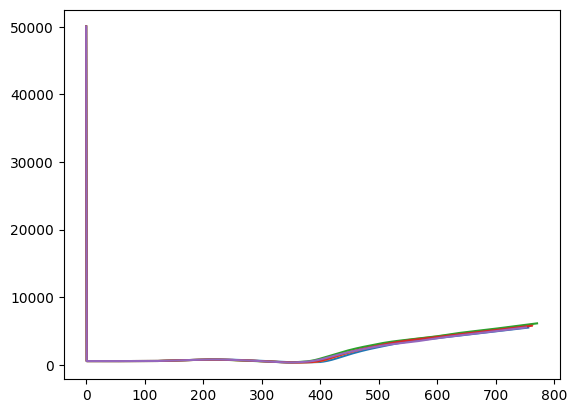

In [9]:
for weather in range(5):
    df_avg = df_array[weather][0]['cvip']
    count=0
    
    for i in range(1,len(df_array[weather])):
        if(df_array[weather][i]['cvip'].dtypes == 'object'):
            print(weather, i)
        if not df_array[weather][i]['cvip'].isnull().values.any():
            df_avg+=df_array[weather][i]['cvip']
            count+=1
    df_avg.interpolate().dropna()/count
    df_avg.plot(plt.title(legend[weather]))

TypeError: 'NoneType' object is not subscriptable

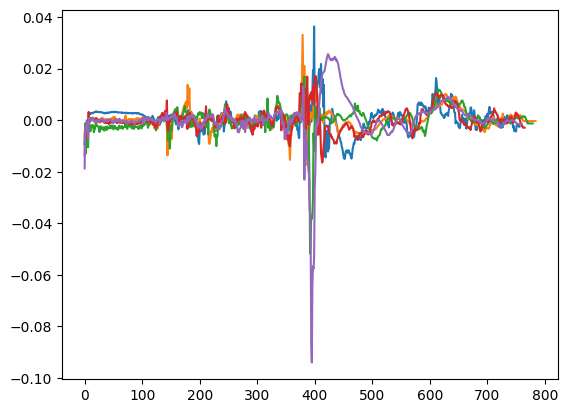

In [11]:
legend = ['clear', '80', '60', '40', '100']
df_avg_dict = {}
for weather in range(6):
    df_avg = df_array[weather][0]['steer']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['steer']
    df_avg = df_avg.interpolate().dropna()/100
    df_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot()
plt.title(legend[weather])
plt.show()

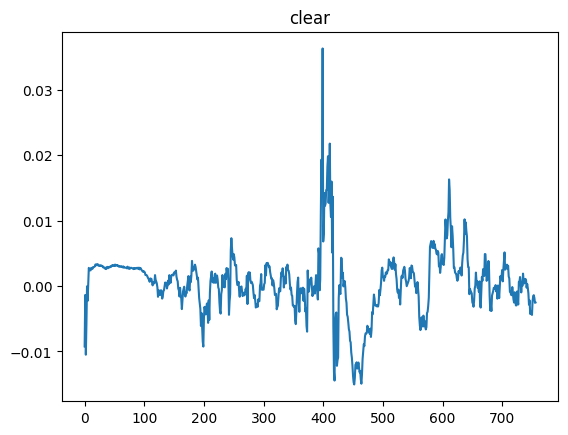

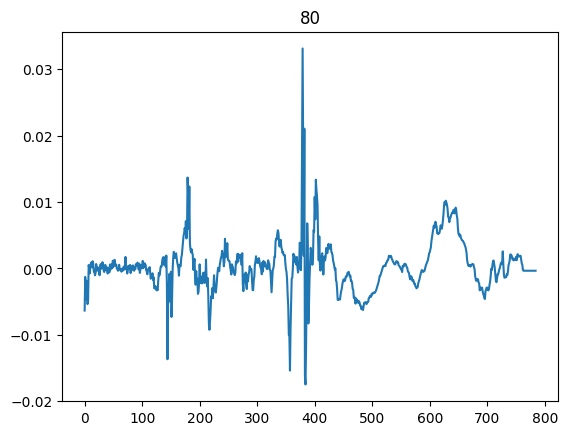

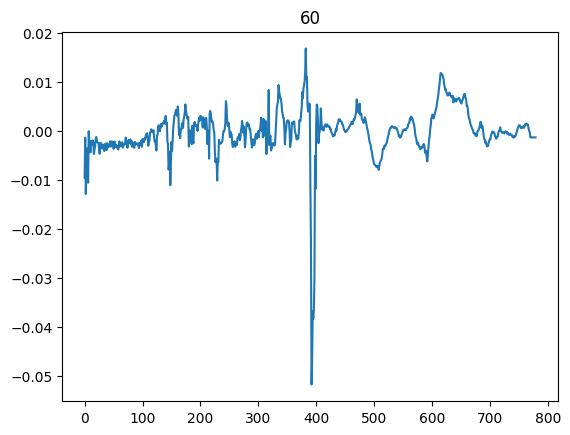

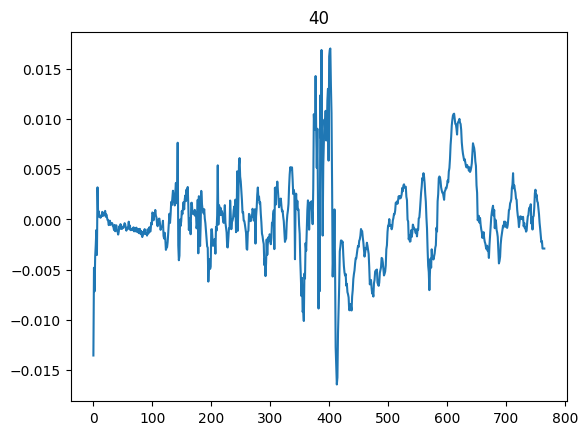

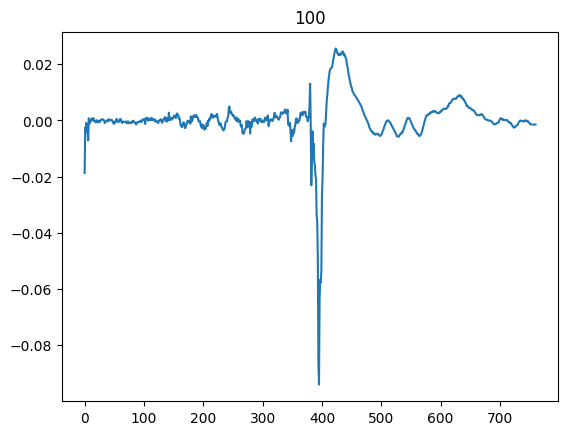

TypeError: 'NoneType' object is not subscriptable

In [13]:
legend = ['clear', '80', '60', '40', '100']
df_avg_dict = {}
for weather in range(6):
    df_avg = df_array[weather][0]['steer']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['steer']
    df_avg = df_avg.interpolate().dropna()/100
    df_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot(y="Age")
    plt.title(legend[weather])
    plt.show()

In [16]:
legend = ['clear', '80', '60', '40', '100']
for i in legend:
    print(df_avg_dict[i])

0     -0.009232
1     -0.001360
2     -0.010501
3     -0.005772
4     -0.000036
         ...   
752   -0.001563
753   -0.001393
754   -0.001791
755   -0.002558
756   -0.002514
Name: steer, Length: 757, dtype: float64
0     -0.006354
1     -0.001287
2     -0.004731
3     -0.001862
4     -0.003303
         ...   
780   -0.000359
781   -0.000359
782   -0.000359
783   -0.000359
784   -0.000359
Name: steer, Length: 785, dtype: float64
0     -0.009485
1     -0.001328
2     -0.012844
3     -0.007865
4     -0.003515
         ...   
775   -0.001272
776   -0.001272
777   -0.001272
778   -0.001272
779   -0.001272
Name: steer, Length: 780, dtype: float64
0     -0.013584
1     -0.004826
2     -0.007179
3     -0.003751
4     -0.002572
         ...   
761   -0.002169
762   -0.002906
763   -0.002906
764   -0.002906
765   -0.002906
Name: steer, Length: 766, dtype: float64
0     -0.018707
1     -0.002538
2     -0.004367
3     -0.000882
4     -0.003250
         ...   
756   -0.001463
757   -0.001463
758 

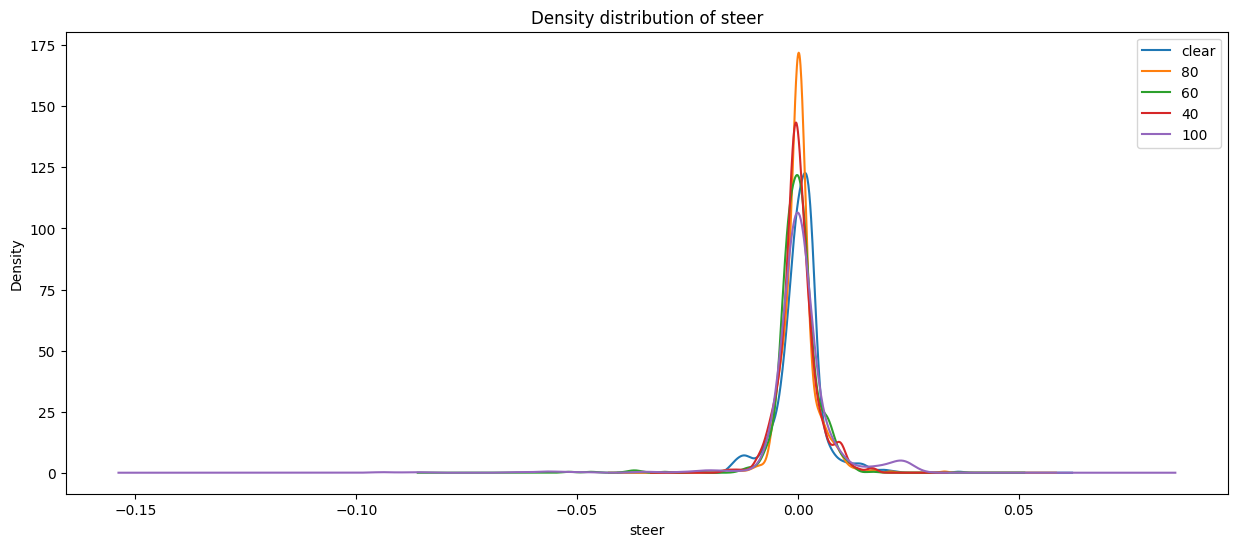

In [17]:
fig = plt.figure(figsize=(15, 6))

for i in legend:
    df_avg_dict[i].plot.density()
plt.xlabel("steer")
plt.title('Density distribution of steer')
plt.legend(legend)
plt.show()

### Dynamic time warping (DTW): measuring similarity between two temporal sequences

In [18]:
result = []
for i in legend:
    distance = dtw.distance(df_avg_dict['clear'], df_avg_dict[i])
    result.append((distance, i))

In [19]:
result.sort(key=lambda y: y[0])
print(result)

[(0.0, 'clear'), (0.05122619684177332, '40'), (0.060084621886104736, '80'), (0.0873876569845602, '60'), (0.1622528804664941, '100')]
